    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Accuracy: 0.89
Precision: 0.8888888888888888
Recall: 0.75
Confusion Matrix:
[[65  3]
 [ 8 24]]


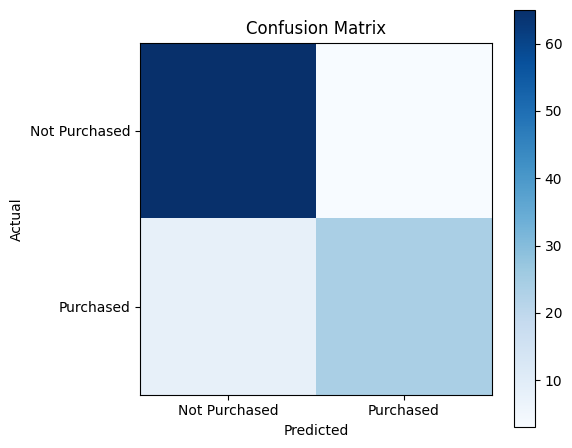

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('Social_Network_Ads.csv')
print(df.head())


X = pd.get_dummies(df, columns=['Gender'], drop_first=True)
X = X.drop('Purchased', axis=1)
y = df['Purchased']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=0)

logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

y_pred=logreg.predict(xtest)

cm= confusion_matrix(ytest, y_pred)


accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Purchased', 'Purchased'])
plt.yticks(tick_marks, ['Not Purchased', 'Purchased'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()